In [13]:
from sympy import *

In [14]:
#general purpose code for interior cases

theta1=Symbol('\\theta_1')
theta2 =Symbol('\\theta_2')
lamb =Symbol('\lambda')
ell =Symbol('\ell')
mu1 =Symbol('\mu_1')
mu2 =Symbol('\mu_2')

def profit(theta1,theta2, mu1, mu2, lamb):
    return ((3*lamb)+ mu2*theta2 - mu1*theta1)**2/(18*lamb)

def t(theta1, theta2, mu1, mu2, lamb):
    return (3*lamb + mu2*theta2 - mu1*theta1)/(6*lamb)

#analyze symmetric simultaneous case first
def nb_objective(theta1,theta2, mu1, mu2, lamb, ell):
    term1 = (profit(theta1,theta2, mu1, mu2, lamb))
    term2 = ( mu2*theta2 + (mu1*theta1- mu2*theta2)*t(theta1, theta2, mu1, mu2,lamb))
    return term1*term2

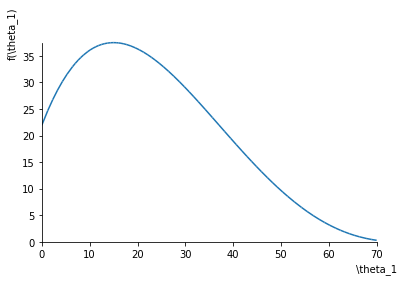

In [24]:
plot(nb_objective(theta1,1.5*10, .5, .5, 10, 70), (theta1,0,70))

In [4]:
foc =  diff(nb_objective(theta1,theta2, mu1, mu2, lamb, ell), theta1)
solve(foc.subs({mu1:.5, mu2:.5, theta2:theta1}),theta1)

[1.5*\lambda]

---------------
case: 6.0*\lambda + \theta_2
---------------


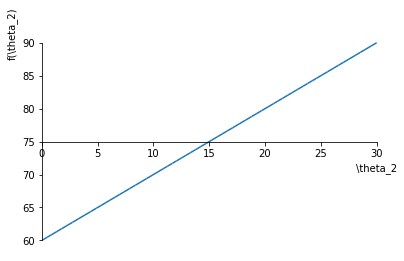

symmetric solution? 7.5*\lambda
---------------
case: 3.75*\lambda + \theta_2 - 0.433012701892219*sqrt(27.0*\lambda**2 + 32.0*\lambda*\theta_2)
---------------


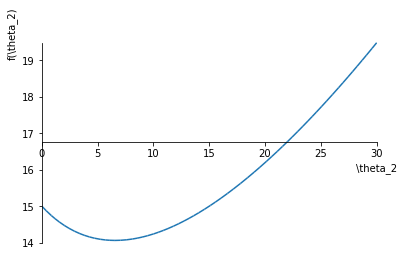

symmetric solution? 5.25*\lambda - 3.75*sqrt(\lambda**2)
---------------
case: 3.75*\lambda + \theta_2 + 0.433012701892219*sqrt(27.0*\lambda**2 + 32.0*\lambda*\theta_2)
---------------


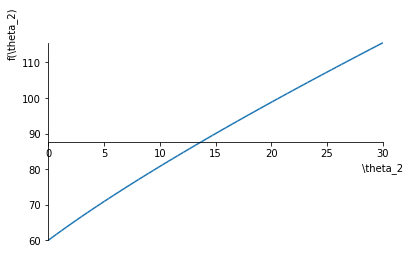

symmetric solution? 5.25*\lambda + 3.75*sqrt(\lambda**2)


In [40]:
mult_sol = simplify(solve(foc.subs({mu1:.5, mu2:.5}),theta1))
outside = 1.5*lamb
for sol in mult_sol:
    print '---------------'
    print 'case: %s\n'%sol,
    print '---------------'
    plot(sol.subs({lamb:10}),(theta2,0,30))
    print 'symmetric solution? %s'%simplify(sol.subs({theta2:1.5*lamb}))

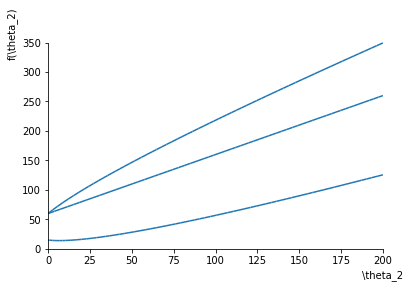

In [48]:
a = 10
plot(mult_sol[0].subs({lamb:a}),mult_sol[1].subs({lamb:a}),mult_sol[2].subs({lamb:a}),(theta2,0,200))

0


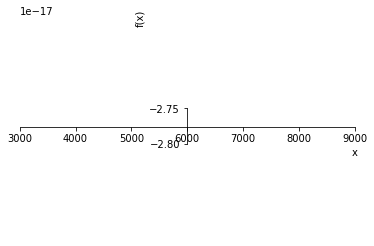

(-0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) + 13500.0)**2*(0.5*\theta_1 - 0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) + (-0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) + 13500.0)*(0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) - 4500.0)/18000 + 4500.0)/54000


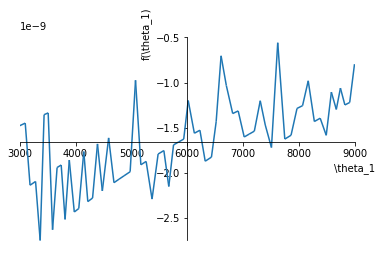

(0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) + 13500.0)**2*(0.5*\theta_1 + 0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) + (-0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) - 4500.0)*(0.866025403784439*sqrt(12000.0*\theta_1 + 27000000.0) + 13500.0)/18000 + 4500.0)/54000


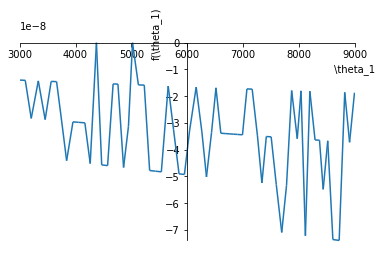

In [92]:
mult_sol = solve(foc,theta2)
a = 3000
b = 1000

for h in mult_sol:
    obj = nb_objective(theta1, simplify(h), .5, .5,lamb,ell)
    obj = obj.subs({lamb:a, ell:b})
    print obj
    plot(obj,(theta1,a,a*3))

stage1 sol :[2.90624999999998*\lambda, 5.99999999999999*\lambda, 6.00000000000005*\lambda] 
response: 2.15624999999998*\lambda - 2.99999999999998*sqrt(\lambda**2) 


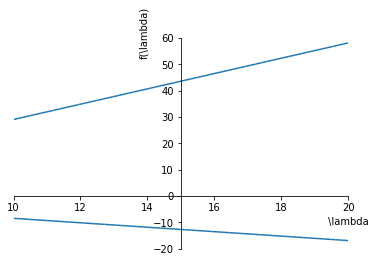

In [71]:
foc =  diff(nb_objective(theta1,theta2, .5, .5, lamb, ell), theta1)
h = solve(foc,theta2)
a = 10


stage1_obj = diff(nb_objective(theta1,simplify(h[1]), .5, .5, lamb, ell), theta1)
stage1_sol = solve(stage1_obj,theta1)
print 'stage1 sol :%s '%stage1_sol
response = (h[1]).subs({theta1:stage1_sol[0]})
print 'response: %s '%response
plot(stage1_sol[0],response,(lamb,10,20))
